# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [2]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.float_format", lambda x: "%.3f" % x)
%matplotlib inline

### Understanding the structure of the data

In [3]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.750,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.080,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.230,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.200,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.590,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [84]:
print("There are", df.shape[0],'rows and', df.shape[1],"column")

There are 1898 rows and 9 column


#### Observations:
There are 1898 rows and 9 columns

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [85]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations: 
There are three datatypes; 4 Integer, 1 Float and 4 Object.


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [86]:
df.head() # Yes, there are missing values under rating.

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.750,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.080,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.230,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.200,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.590,Weekday,4,25,24


In [87]:
df.columns

Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time'],
      dtype='object')

In [88]:
# Looking the unique of the columns
df["rating"].unique()

array(['Not given', '5', '3', '4'], dtype=object)

In [89]:
# Replacing the the Not given with nan
df["rating"]=df["rating"].replace(['Not given'],np.nan)
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.750,Weekend,NaN,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.080,Weekend,NaN,25,23
2,1477070,66393,Cafe Habana,Mexican,12.230,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.200,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.590,Weekday,4,25,24


In [90]:
df.isnull().sum()

order_id                   0
customer_id                0
restaurant_name            0
cuisine_type               0
cost_of_the_order          0
day_of_the_week            0
rating                   736
food_preparation_time      0
delivery_time              0
dtype: int64

#### Observations: 

There ars 736 missing values in the rating columns


In [91]:
#### Change the rating data type to float
df["rating"]=df["rating"].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1162 non-null   float64
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 133.6+ KB


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [93]:
# Write your code here
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.000,1477495.500,548.050,1476547.000,1477021.250,1477495.500,1477969.750,1478444.000
customer_id,1898.000,171168.478,113698.140,1311.000,77787.750,128600.000,270525.000,405334.000
cost_of_the_order,1898.000,16.499,7.484,4.470,12.080,14.140,22.297,35.410
rating,1162.000,4.344,0.741,3.000,4.000,5.000,5.000,5.000
food_preparation_time,1898.000,27.372,4.632,20.000,23.000,27.000,31.000,35.000
delivery_time,1898.000,24.162,4.973,15.000,20.000,25.000,28.000,33.000


#### Observations:

The Minimum time for food to be prepared is 20 minutes

The Average time for the food to be prepared is 27.372 minutes

The Maximum time for the food to be prepared is 35 minutes

### **Question 5:** How many orders are not rated? [1 mark]

In [94]:
df.isnull().sum()

order_id                   0
customer_id                0
restaurant_name            0
cuisine_type               0
cost_of_the_order          0
day_of_the_week            0
rating                   736
food_preparation_time      0
delivery_time              0
dtype: int64

#### Observation

There are 736 orders not rated


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [95]:
# Write the code here

In [96]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.750,Weekend,NaN,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.080,Weekend,NaN,25,23
2,1477070,66393,Cafe Habana,Mexican,12.230,Weekday,5.000,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.200,Weekend,3.000,25,15
4,1478249,76942,Dirty Bird to Go,American,11.590,Weekday,4.000,25,24


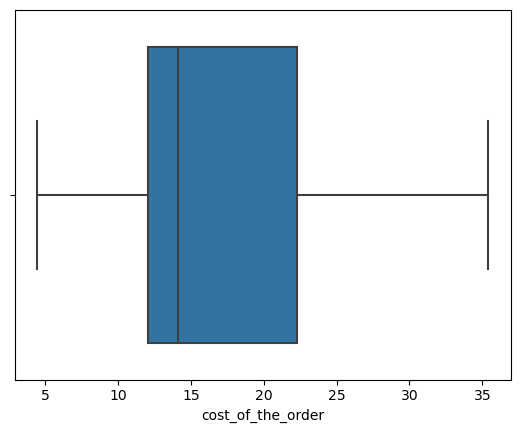

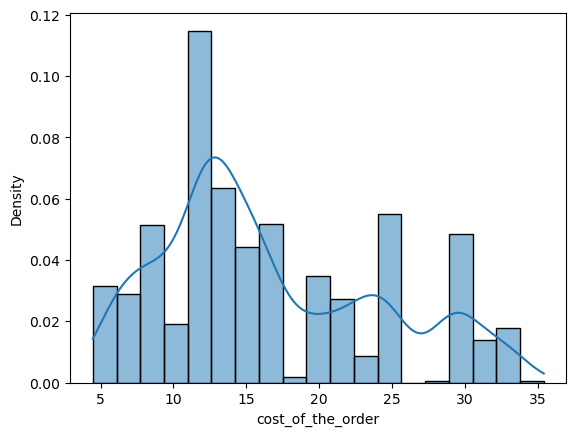

In [97]:
sns.boxplot(data=df,x='cost_of_the_order')
plt.show()
sns.histplot(data=df,x='cost_of_the_order',stat='density',kde=True)
plt.show()



#### Observation

There are no outliers 

Most cost of orders are below $35

The distribution are rightly skewed

# Observation based on rating

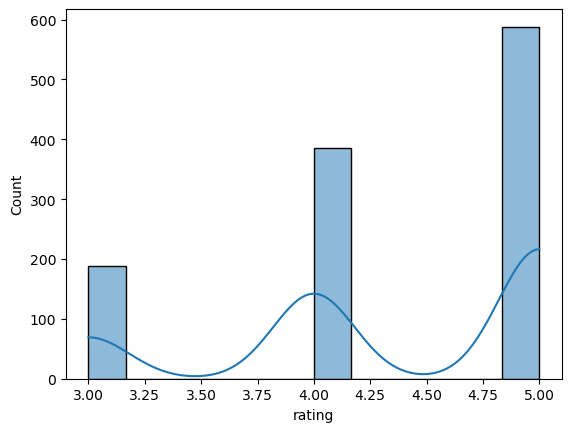

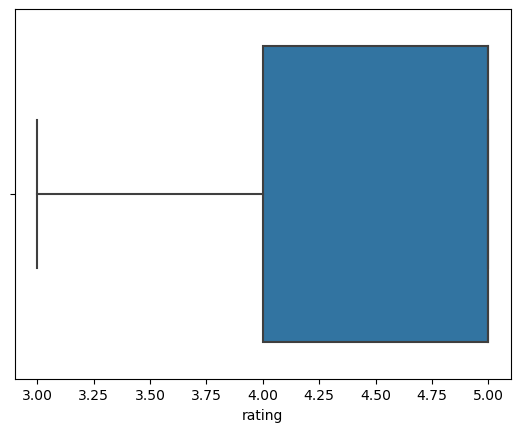

In [133]:
sns.histplot(data=df.rating,kde=True)
plt.show()
sns.boxplot(data=df,x='rating')
plt.show()



####
* The distribution is leftly skewed
* There are no outliers
* The count shows progresive rating from 3 to 5

# Observation on food preparation time

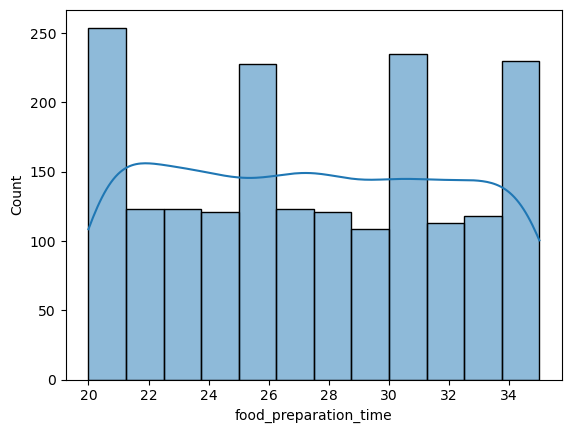

In [137]:
sns.histplot(data=df.food_preparation_time,kde=True)
plt.show()




## Observation on Cuisine Type


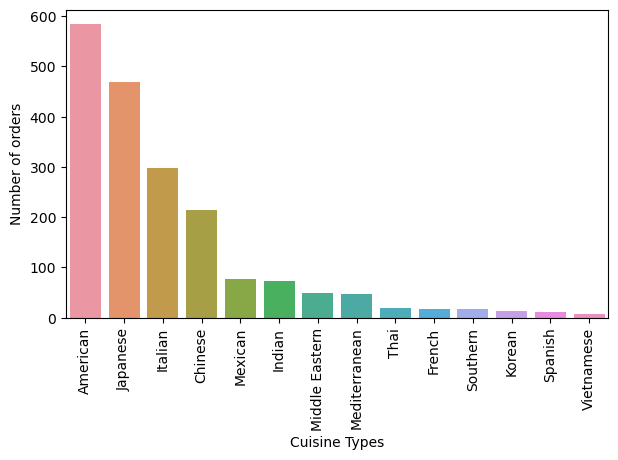

In [135]:
#plots histogram of the number of orders, from highest to lowest, for each cuisine type
plt.figure(figsize=(7,4))
ax=sns.countplot(data=df, x='cuisine_type', order= df['cuisine_type'].value_counts().index)
ax.tick_params(axis='x', rotation=90)
ax.set(xlabel='Cuisine Types')
ax.set(ylabel='Number of orders')
plt.show()

### Observation
The American cuisine has the most order among other cuisines.

### Observation on Day of the week

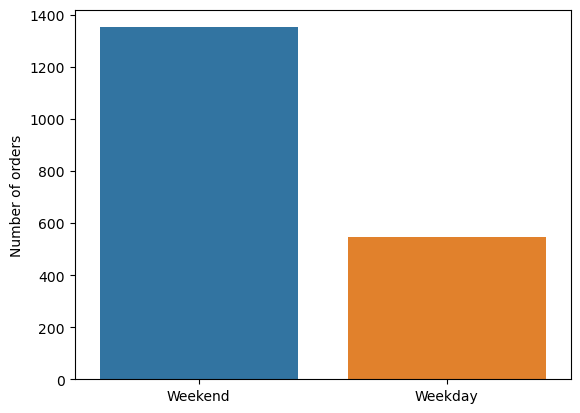

In [139]:
#countplot of orders by day of the week the order was placed
ax=sns.countplot(data=df,x='day_of_the_week')
ax.set(xlabel='')
ax.set(ylabel='Number of orders')
plt.show()

### Observation
The Orders from the weekend are more than orders from weekdays

### Observation on rating

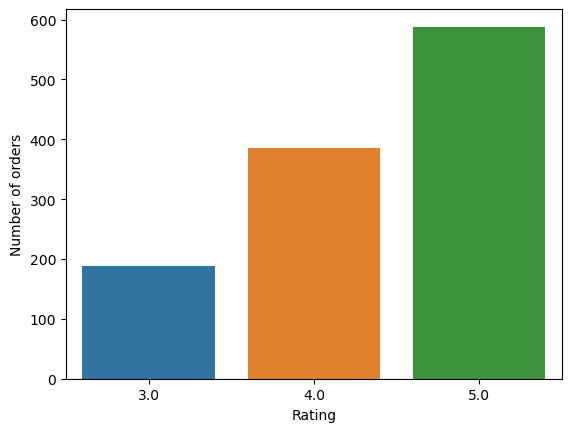

In [140]:
# Countplot of orders by rating
df1=df.sort_values('rating')
ax=sns.countplot(data=df1, x='rating')
ax.set(xlabel='Rating')
ax.set(ylabel='Number of orders')
plt.show()

### Observation
The rating of 5 has the highest number of Orders placed. 

### Observation on delivery time

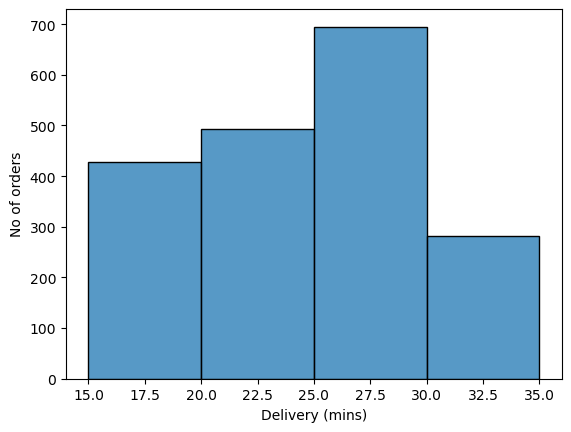

In [141]:
#histogram of delivery times
arr=np.array(range(15,35,5))
ax=sns.histplot(data=df, x='delivery_time',bins=arr, binwidth=5)
ax.set(xlabel='Delivery (mins)')
ax.set(ylabel='No of orders')
plt.show()

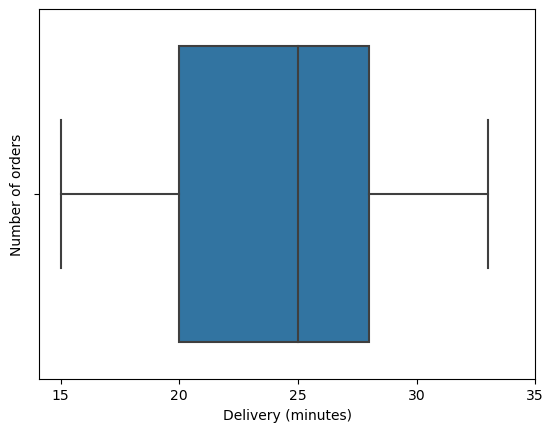

In [142]:
#returns histogram of delivery times
arr=np.array(range(15,35,5))
ax=sns.boxplot(data=df, x='delivery_time')
ax.set(xlabel='Delivery (minutes)')
ax.set(ylabel='Number of orders')
ax.set(xticks=[15,20,25,30,35])
plt.show()

### Observation
The median delivery time is 25 mins, the minimum delivert time  is 15 mins, and the maximum delivery time is about 32.5 mins

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [99]:
df.restaurant_name.value_counts().head(5)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64

#### Observations:
The top 5 restaurant in terms of the number of orders are;
1. Shake Shack               219
2. The Meatball Shop         132
3. Blue Ribbon Sushi         119
4. Blue Ribbon Fried Chicken 96
5. Parm                      68


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [100]:
df[df.day_of_the_week!='Weekday']['cuisine_type'].value_counts()

cuisine_type
American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: count, dtype: int64

#### Observations:
The most popular cuisine on weekends is the American cuisine


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [101]:
(df[df['cost_of_the_order'] > 20]['order_id'].count()/df['order_id'].count()) *100

29.24130663856691

#### Observations:
The percentage of orders that cost more than 20 dollars is about 29.24 percent.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [102]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.000,1477495.500,548.050,1476547.000,1477021.250,1477495.500,1477969.750,1478444.000
customer_id,1898.000,171168.478,113698.140,1311.000,77787.750,128600.000,270525.000,405334.000
cost_of_the_order,1898.000,16.499,7.484,4.470,12.080,14.140,22.297,35.410
rating,1162.000,4.344,0.741,3.000,4.000,5.000,5.000,5.000
food_preparation_time,1898.000,27.372,4.632,20.000,23.000,27.000,31.000,35.000
delivery_time,1898.000,24.162,4.973,15.000,20.000,25.000,28.000,33.000


#### Observations:
The mean order delivery time is 24.162 minutes

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [103]:
pd.DataFrame(df['customer_id'].value_counts()).head(3)

,count
customer_id,
52832,13
47440,10
83287,9


#### Observations:
The top 3 most frequent customers with customer IDs are
1. 52832 with 13 orders
2. 47440 with 10 orders
3. 83287 with 9 orders

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


C:\Users\succe\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


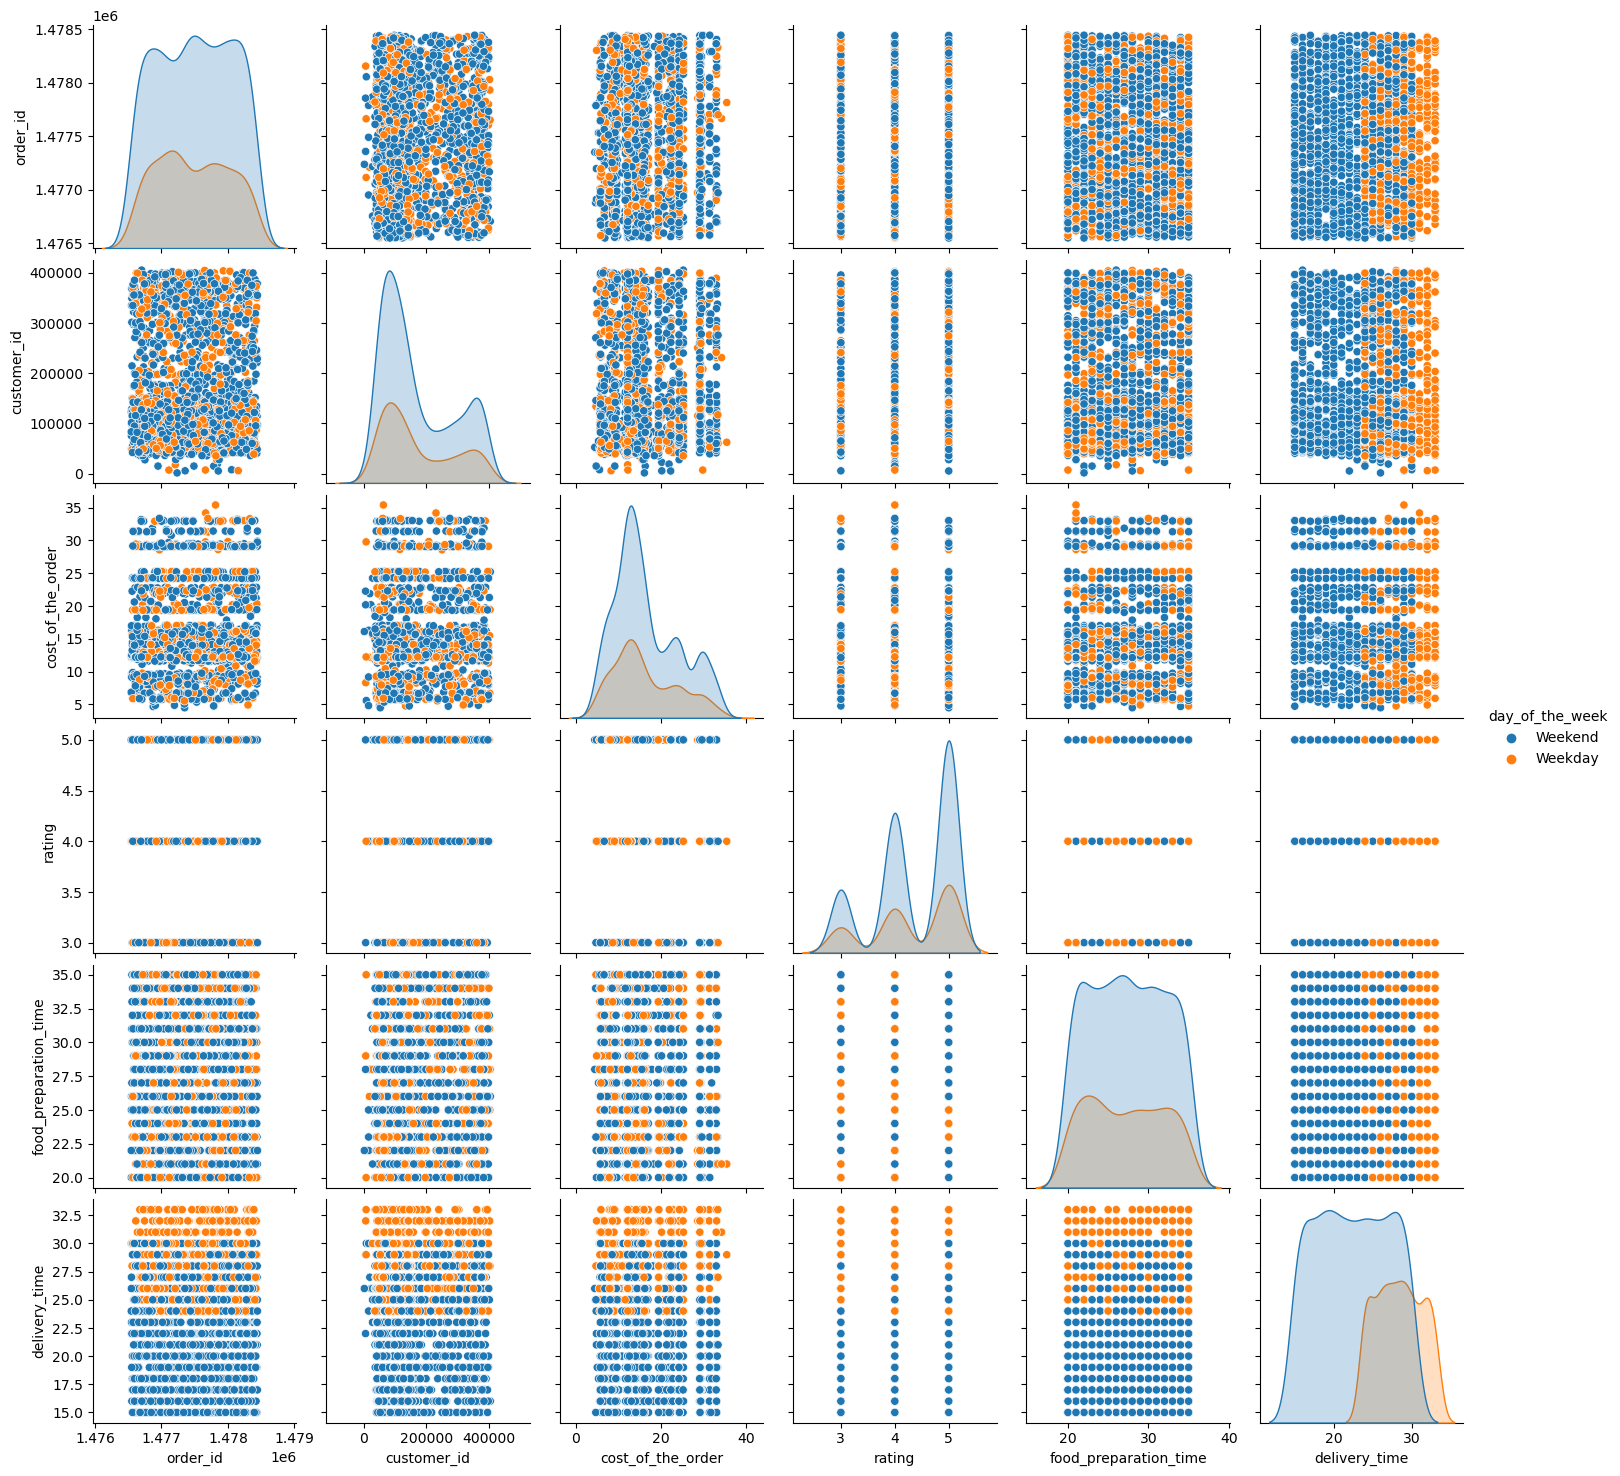

In [108]:
# Pairplot of data set
sns.pairplot(data=df, hue='day_of_the_week')
plt.show()

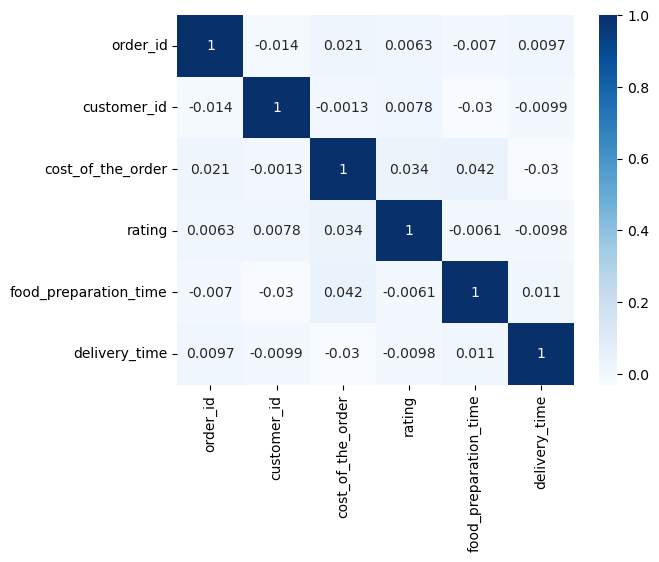

In [132]:
df1 = df.loc[:,['order_id', 'customer_id', 'cost_of_the_order','rating', 'food_preparation_time', 'delivery_time']]
corr = df1.corr()
sns.heatmap(corr, cmap="Blues", annot=True)
plt.show() 

# Observation
The multivariate analysis of the dataset shows no significant correlations between any of the columns in the dataset

In [106]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.750,Weekend,NaN,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.080,Weekend,NaN,25,23
2,1477070,66393,Cafe Habana,Mexican,12.230,Weekday,5.000,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.200,Weekend,3.000,25,15
4,1478249,76942,Dirty Bird to Go,American,11.590,Weekday,4.000,25,24


### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
df.head()

In [ ]:
# Data with no rating constraint
no_rating= df['rating'].isnull() == False

# Removing the 'Not Given' rating from the dataset
nr = df[no_rating].groupby('restaurant_name')['rating'].count()

# Getting the number restaurant with more than 50 rating
nr50 = df[no_rating].groupby('restaurant_name')['rating'].count() >50

# Average rating of the restuarant greater than 4
zr = df.groupby(['restaurant_name'])['rating'].mean() > 4

nr.loc[nr50 & zr]

#### Observations:

Only four restaurant have 50 or more with rating greater than 4. they are ;

Blue Ribbon Fried Chicken     (64 orders),
Blue Ribbon Sushi             (73 orders),
Shake Shack                  (133 orders),
The Meatball Shop             (84 orders)

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
dg20 = df[df.cost_of_the_order>20]
ta1 = dg20.cost_of_the_order.sum()*.25
dl20=df[df.cost_of_the_order<=20]
ta2=dl20[dl20.cost_of_the_order>5].cost_of_the_order.sum()*.15
total_revenue = ta1 + ta2
print(round(total_revenue,2))

#### Observations:

The company would generate 6166.3 dollars

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
df['total_time']=df['food_preparation_time']+df['delivery_time']
round(len(df[df['total_time']>60])/len(df)*100,1)

#### Observations:
Approximately 10.5 percent of customers' orders take more than 60 minutes to be delivered

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
pd.DataFrame(df.groupby('day_of_the_week')['delivery_time'].mean())

#### Observations:
The mean delivery time during weekdays is higher than the weekend. The mean delivery time for the weekdays is 5.87 minutes higher than that of the weekend.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  About 93% of the orders are for American, Japanese, Italian and Chinese cuisines. This shows that cuisine are more popular among customers of FoodHub.
* The most popular restaurant shows to be Shake Shack because it received the highest number of orders.
* Order volumes shows to be more on the weekends compared to the weekdays.
* The delivery time over the weekends is lesser compared to the weekdays.
* About 39% of the orders were not rated.


### Recommendations:

* FoodHub should focus on restaurants serving American, Japanese, Italian and Chinese cuisines as these cuisines has shown to be very popular among FoodHub customers.

* FoodHub should provide promotional offers to top-rated popular restaurants like Shake Shack that serve most of the orders.

* The order volume is higher during the weekends, more delivery persons could be hired during the weekends to ensure timely delivery of the order.

* FoodHub should consider minimizing orders that have more 60 minutes total delivery time instances in order to avoid customer dissatisfaction.

---